In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib notebook 

In [2]:
# On charge les dataframe
df_train = pd.read_csv('sources/train.csv')
df_test = pd.read_csv('sources/test.csv')

In [3]:
!pip install pandas_profiling

In [4]:
import pandas_profiling
df_train.profile_report(style={'full_width':True})

In [5]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))
print("-"*79)
categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))
print("-"*79)
print(df_train[numerical_feats].columns)
print("-"*79)
print(df_train[categorical_feats].columns)

Number of Numerical features:  38
---------------------------------------------------------------------------
Number of Categorical features:  43
---------------------------------------------------------------------------
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
---------------------------------------------------------------------------
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandS

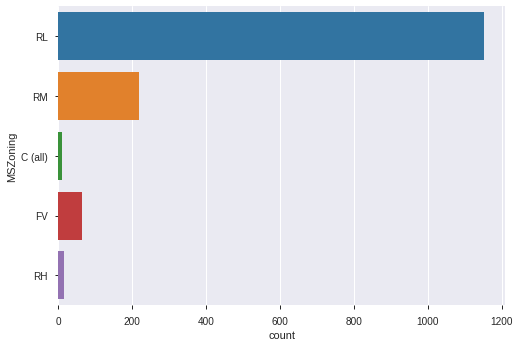

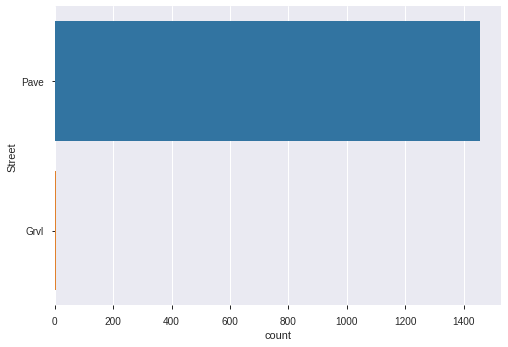

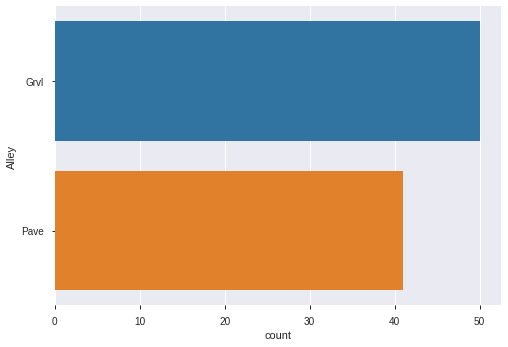

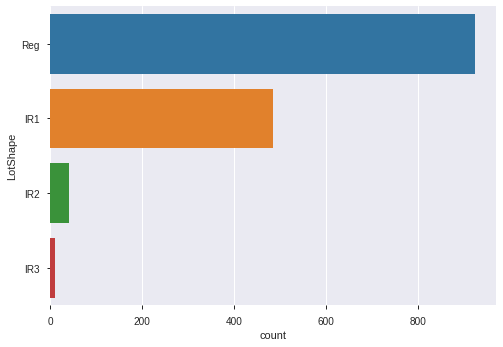

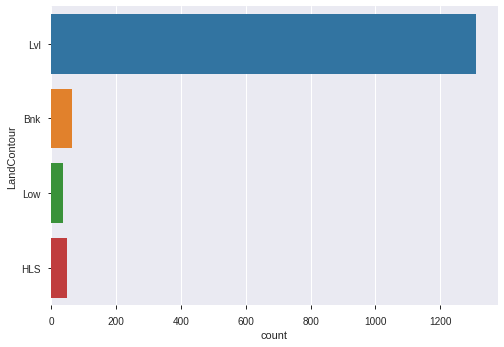

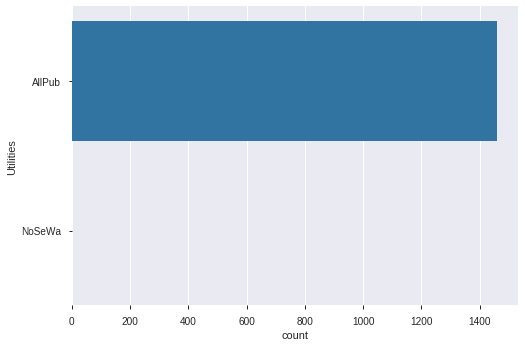

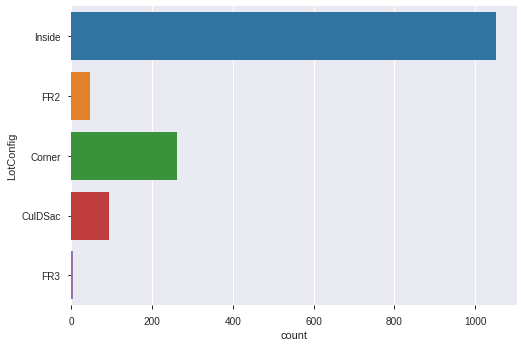

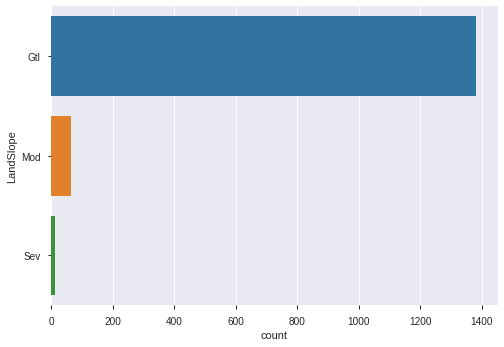

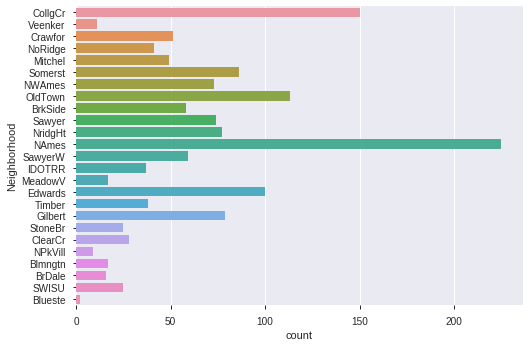

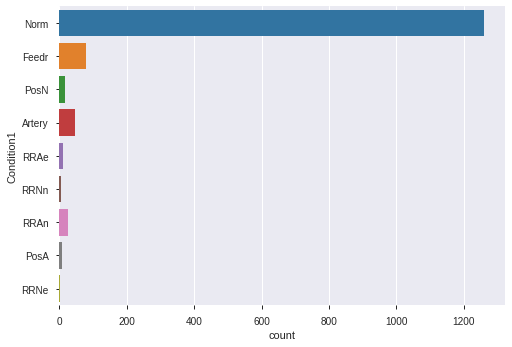

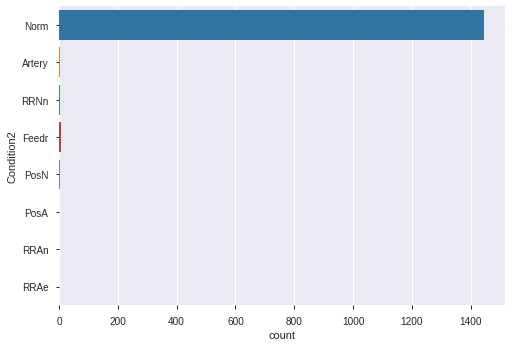

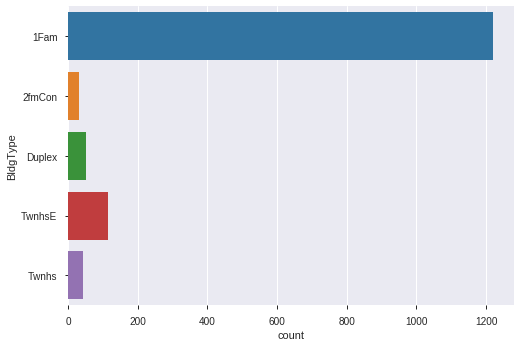

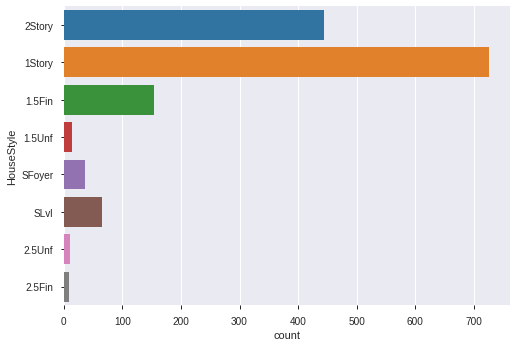

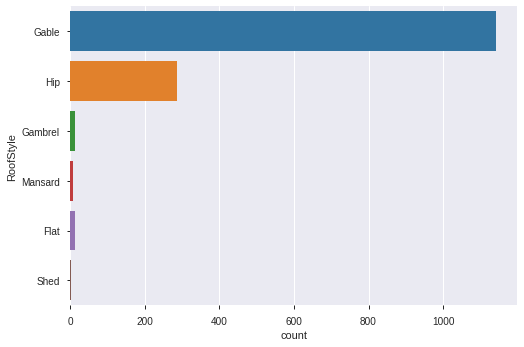

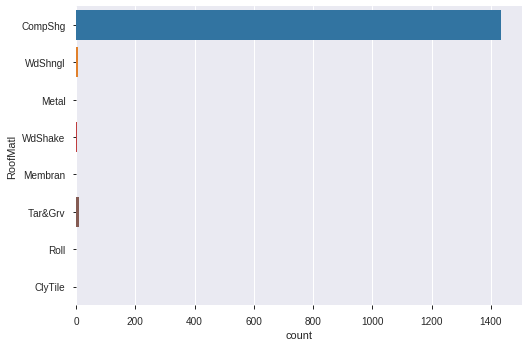

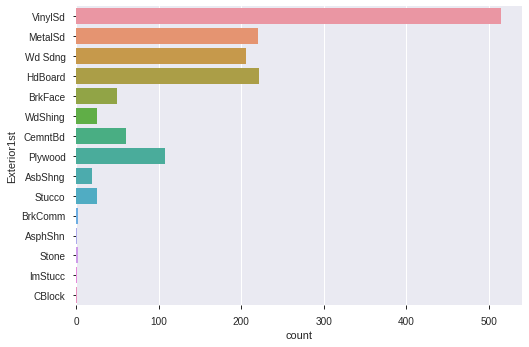

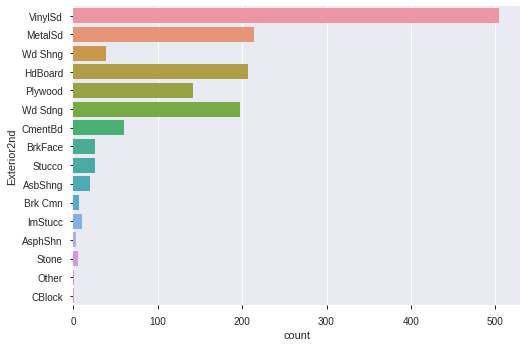

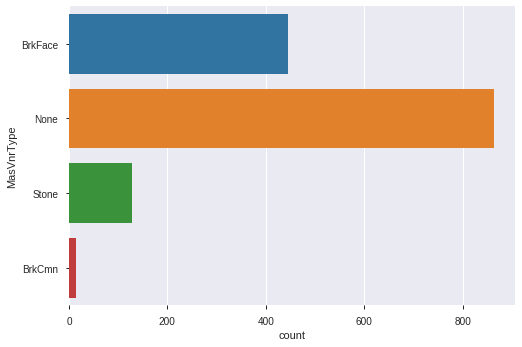

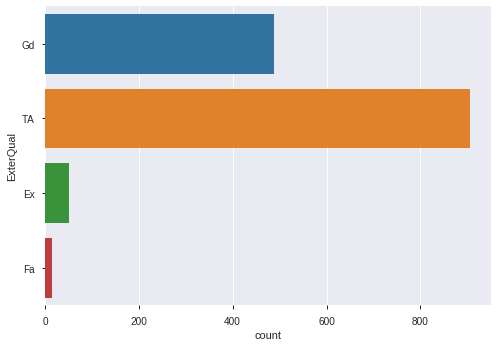

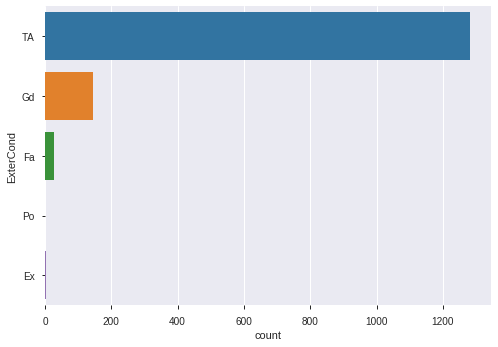

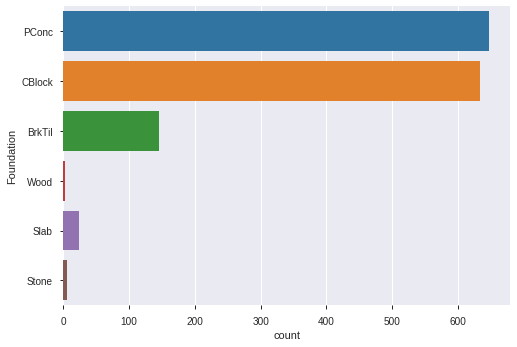

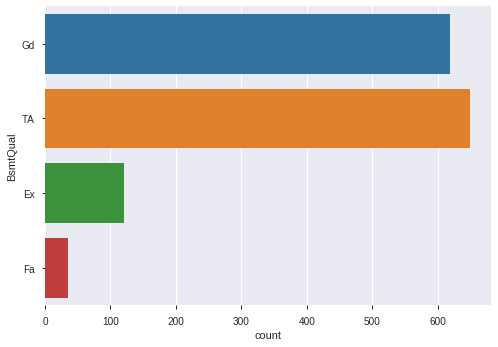

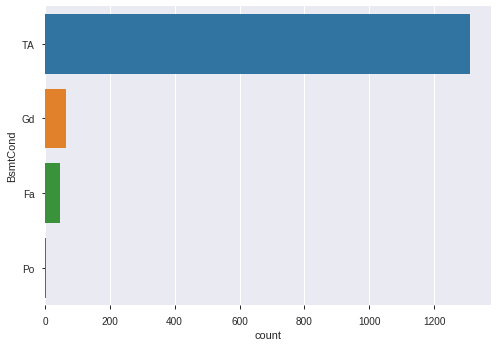

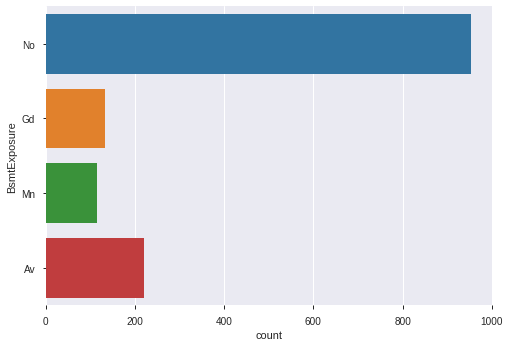

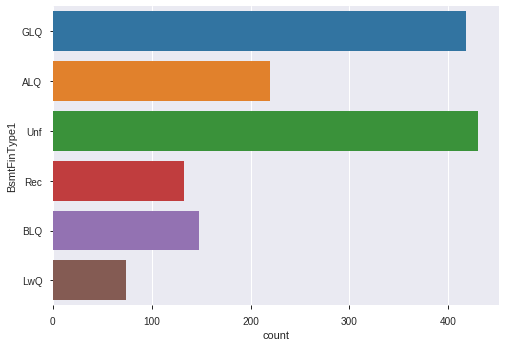

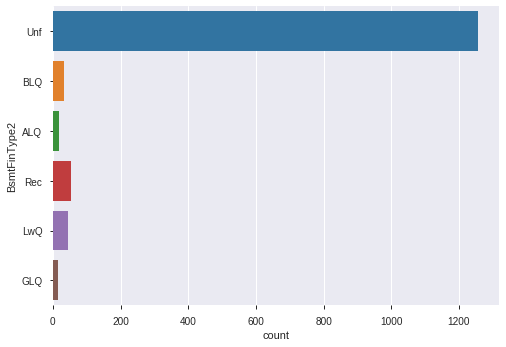

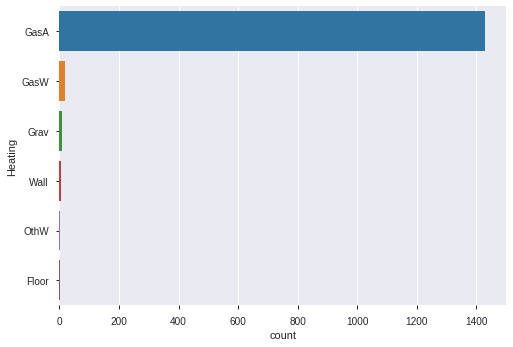

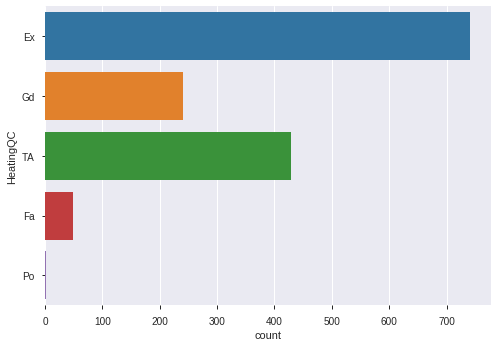

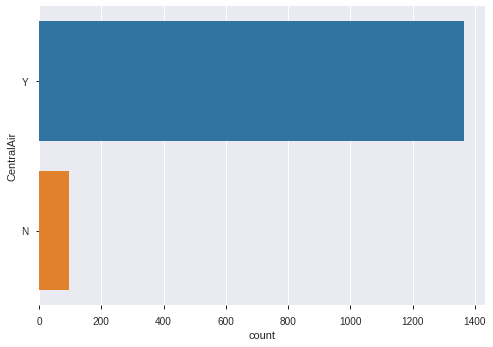

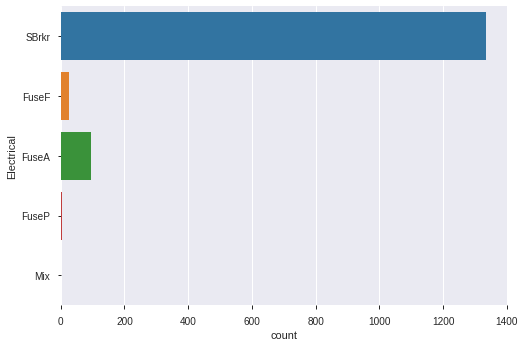

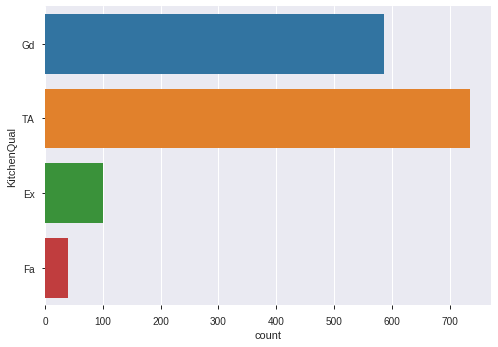

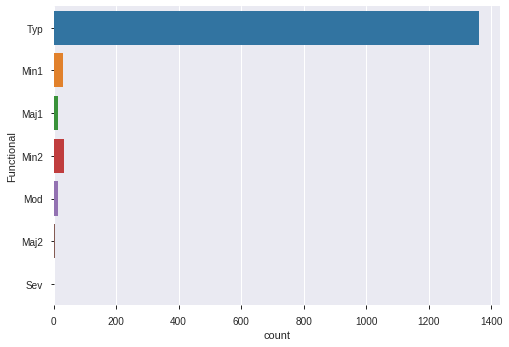

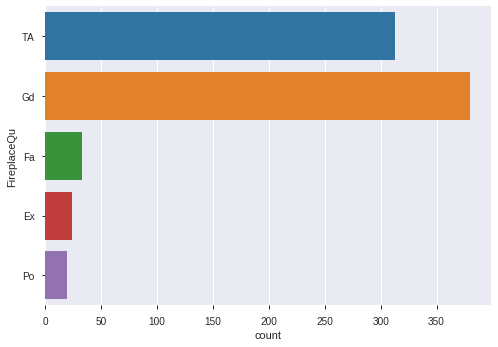

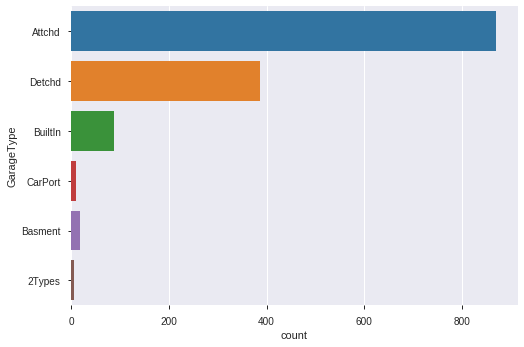

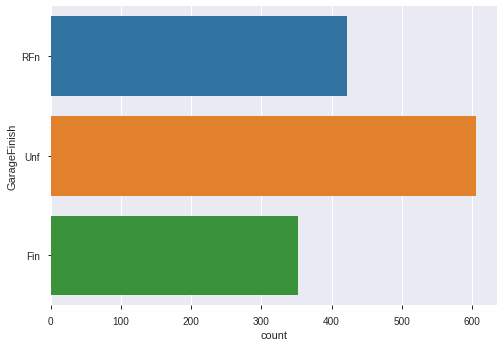

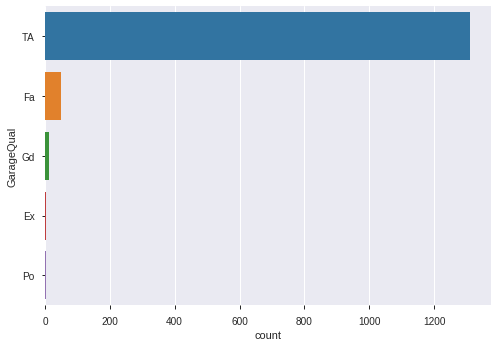

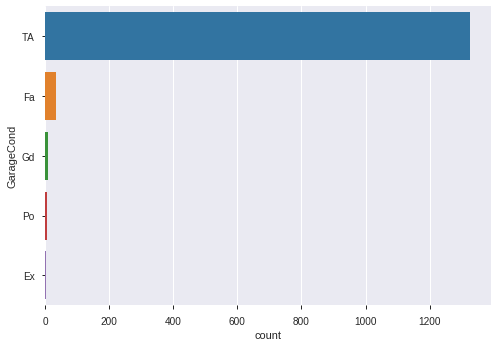

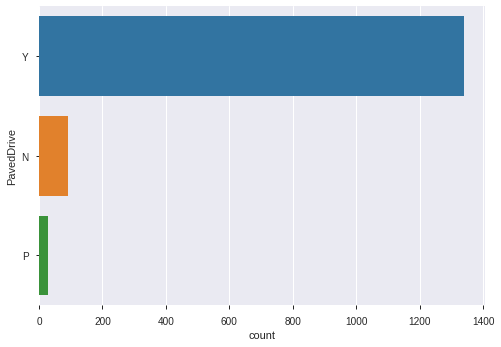

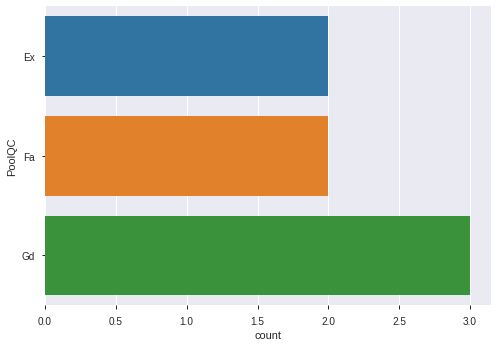

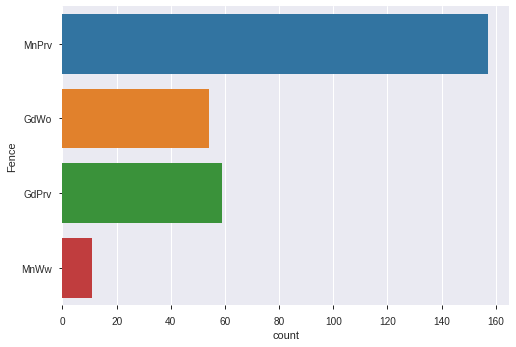

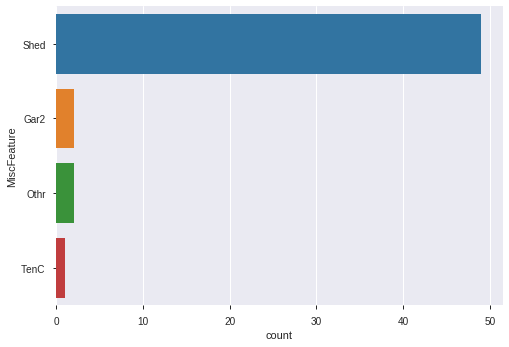

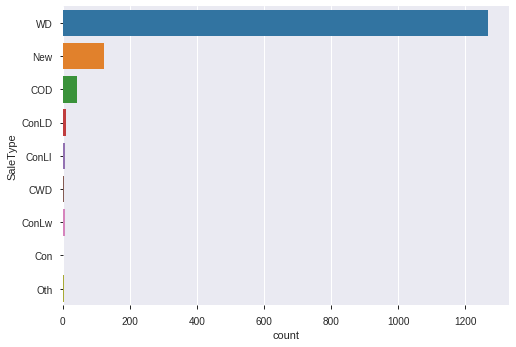

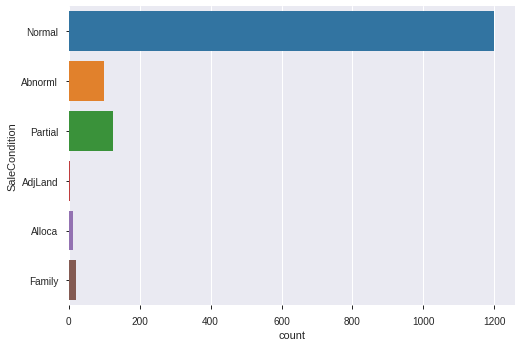

In [6]:
# Plot bar plot for each categorical feature
for feature in df_train.dtypes[df_train.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df_train)
    plt.show()

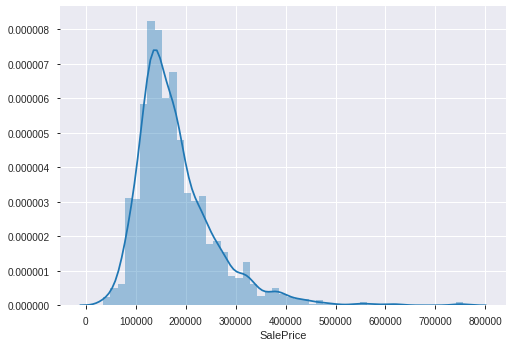

In [7]:
sns.distplot(df_train['SalePrice']);

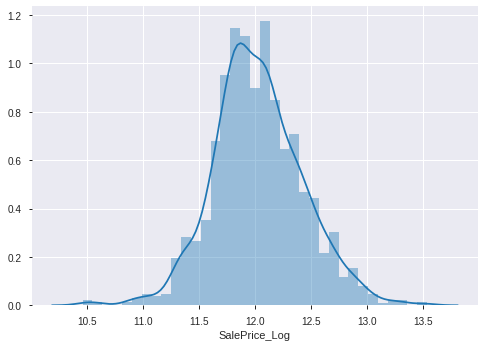

In [8]:
df_train['SalePrice_Log'] = np.log1p(df_train['SalePrice'])
sns.distplot(df_train['SalePrice_Log']);

In [9]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageQual       81  0.055479
GarageCond       81  0.055479
GarageFinish     81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
RoofStyle         0  0.000000

In [10]:
# columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    df_train[col].fillna('None',inplace=True)
    df_test[col].fillna('None',inplace=True)

In [11]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

Total   Percent
LotFrontage    259  0.177397
GarageYrBlt     81  0.055479
MasVnrArea       8  0.005479
Foundation       0  0.000000
RoofStyle        0  0.000000

In [12]:
# fillna with mean or mode for the remaining values
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)
# df_train.fillna(df_train.mode(), inplace=True) mode -> la valeur la plus représentée dans le dataset
# df_test.fillna(df_test.mode(), inplace=True)

In [13]:
df_train.isnull().sum().sum()

0

In [14]:
df_test.isnull().sum().sum()

0

Split dataset

In [ ]:
# Split
from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(df_train, test_size=0.2, random_state=42)

In [ ]:
X_train_num = X_train[numerical_feats]

Standardize and Normalize Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_num)
X_scaled

In [ ]:
type(X_scaled)

In [15]:
pca = PCA(n_components=2)
pca.fit_transform(df_train[numerical_feats])
print(f"Axes : {pca.explained_variance_ratio_}")
print(f"Sum : {sum(pca.explained_variance_ratio_)}")
print(pca.singular_values_) 

NameError: name 'PCA' is not defined

In [ ]:
pca.components_

In [ ]:
# # Split
# from sklearn.model_selection import train_test_split
# X_train, X_val = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# X_train.head(5)

In [ ]:
# y_train = X_train['SalePrice'].values
# X_train = X_train.drop('SalePrice', axis=1).values

In [ ]:
# X_train_num = X_train.select_dtypes(include=['number']).copy()

In [ ]:
# X_train_num.head(5)

In [ ]:
# from sklearn import preprocessing
# mm_scaler = preprocessing.MinMaxScaler()
# X_train = mm_scaler.fit_transform(X_train_num)

In [ ]:
# X_train_num

In [ ]:
# X_train = pd.DataFrame(data=X_train[1:,1:], index=X_train[1:,0], columns=X_train[0,1:])
# X_train

In [ ]:
# Y = X_train['SalePrice']
# X = X_train.drop('SalePrice', axis=1)

In [ ]:
# from sklearn.linear_model import LinearRegression
# lin_reg = LinearRegression()
# lin_reg.fit(X, Y)